# MNIST - Classification with SVC (Support Vector Classification)

This image classification project focuses on the MNIST dataset (a dataset of handwritten numbers from 0 to 9). The classification problem is solved by:
- Trying different SVC models (linear, polynomial, RBF)
- Hyperparameter Tuning
- Data Augumentation

Due to limitations of RAM, the augmented dataset could not be trained. However, a final test accuracy of 97% was reached. The model was saved as 'svc_final.pkl' in line 40.

<h1 align="center">- $\infty$ -</h1> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

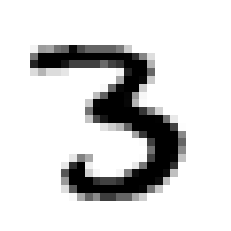

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[12]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [6]:
y_df_ratio = pd.DataFrame(y, columns=["y"])["y"].value_counts()  / len(y)
print("The ratio of numbers in the dataset:\n", y_df_ratio)

The ratio of numbers in the dataset:
 1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: y, dtype: float64


In [7]:
# Split into training and test set
from sklearn.model_selection import train_test_split

In [8]:
# Random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Stratified sampling
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Comparing sampling methods to see the best sampling method..
y_df_sample = pd.DataFrame(y_train, columns=["y"])["y"].value_counts()  / len(y_train)
y_df_ssample = pd.DataFrame(y_train_s, columns=["y"])["y"].value_counts()  / len(y_train_s)

pd.DataFrame({"population": y_df_ratio,
             "rd_sample": y_df_sample,
             "strt_sample": y_df_ssample,
             "rd_diff": y_df_ratio-y_df_sample,
             "strt_diff": y_df_ratio-y_df_ssample}).reset_index()

,index,population,rd_sample,strt_sample,rd_diff,strt_diff
0,0,0.098614,0.099286,0.098607,-0.000671,0.000007
1,1,0.112529,0.112089,0.112536,0.000439,-0.000007
2,2,0.099857,0.100179,0.099857,-0.000321,0.000000
3,3,0.102014,0.101929,0.102018,0.000086,-0.000004
4,4,0.097486,0.098732,0.097482,-0.001246,0.000004
5,5,0.090186,0.090000,0.090196,0.000186,-0.000011
6,6,0.098229,0.097857,0.098232,0.000371,-0.000004
7,7,0.104186,0.103393,0.104179,0.000793,0.000007
8,8,0.097500,0.097643,0.097500,-0.000143,0.000000
9,9,0.099400,0.098893,0.099393,0.000507,0.000007


In [11]:
pd.concat([y_df_ratio, y_df_sample, y_df_ssample],axis=1)

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,y,y,y
0,0.098614,0.099286,0.098607
1,0.112529,0.112089,0.112536
2,0.099857,0.100179,0.099857
3,0.102014,0.101929,0.102018
4,0.097486,0.098732,0.097482
5,0.090186,0.090000,0.090196
6,0.098229,0.097857,0.098232
7,0.104186,0.103393,0.104179
8,0.097500,0.097643,0.097500
9,0.099400,0.098893,0.099393


**Stratified Sampling**
- Stratified random sampling is a sampling method that involves taking samples of a population subdivided into smaller groups called strata.
- Stratified random sampling involves taking random samples from stratified groups, in proportion to the population.
- Stratified random sampling is a more precise metric since it's a better representation of the overall population.


- Took the chance to study stratified sampling. Does not really apply for this problem since the objective is to train an image recognition system and each "number" sample is close to 10% of the sample. However, I will used the stratified sample anyway to be close to the population distribution.

In [12]:
# Using stratified sampling as the sampling method.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(loss="hinge"))
])

In [13]:
m = svc_pipeline.fit(X_train, y_train)

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
y_pred = m.predict(X_train)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.93075

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred)

array([[5405,    2,   19,    5,    7,   17,   26,    5,   34,    2],
       [   1, 6176,   28,   14,    6,   17,    6,    8,   40,    6],
       [  39,   26, 5144,   67,   44,   22,   47,   49,  139,   15],
       [  11,   15,  151, 5141,    9,  142,   19,   39,  118,   68],
       [   8,   16,   19,    8, 5179,   13,   29,   16,   32,  139],
       [  41,   12,   36,  129,   51, 4544,   73,   13,  106,   46],
       [  23,   14,   38,    5,   22,   82, 5275,    7,   33,    2],
       [  17,   16,   72,   17,   48,   14,    5, 5473,   15,  157],
       [  39,   95,   71,  128,   34,  140,   41,   33, 4815,   64],
       [  35,   14,   21,   95,  163,   41,    2,  163,   62, 4970]])

### Linear SVC - Cross validation score

All tests will consist of the first 1000 instances of the train set to reduce the training times.

In [14]:
# Standardize the X_train
std = StandardScaler()
X_train_std = std.fit_transform(X_train)

In [37]:
## Cross-validation score
from sklearn.model_selection import cross_val_score

m_linear = LinearSVC(loss="hinge")

cross_val_score(m_linear, X_train_std[:1000,:], y_train[:1000], cv=3)

array([0.73652695, 0.76276276, 0.72972973])

### Training SVC with Polynomial Kernel

In [28]:
from sklearn.svm import SVC

In [43]:
m_poly = SVC(kernel="poly", C=1, degree=1, gamma="scale")

cross_val_score(m_poly, X_train_std[:1000,:], y_train[:1000], cv=3)

array([0.84730539, 0.87987988, 0.86786787])

### Training SVC with RBF (distance function) Kernel

In [39]:
m_rbf = SVC(kernel="rbf", C=1, gamma="scale")

cross_val_score(m_rbf, X_train_std[:1000,:], y_train[:1000], cv=3)

array([0.85329341, 0.85585586, 0.84084084])

**RBF proves to be the best kernel, we will optimize for this kernel.**

### RandomizedSearchCV for RBF Kernel to Optimize Parameters 

In [47]:
from scipy.stats import uniform, reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distributions = [{"C" : uniform(0.1, 10),
                       "gamma": reciprocal(0.001, 0.1)}]
svc = SVC(kernel="rbf", gamma="scale")
rnd_search = RandomizedSearchCV(svc, param_distributions, cv=3, n_iter=15, verbose=2)
rnd_search.fit(X_train_std[:1000,:], y_train[:1000])

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=3.785956189980184, gamma=0.06335131970954248 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=3.785956189980184, gamma=0.06335131970954248, total=   1.1s
[CV] C=3.785956189980184, gamma=0.06335131970954248 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ... C=3.785956189980184, gamma=0.06335131970954248, total=   1.0s
[CV] C=3.785956189980184, gamma=0.06335131970954248 ..................
[CV] ... C=3.785956189980184, gamma=0.06335131970954248, total=   1.0s
[CV] C=2.0598478932518614, gamma=0.06512777076854923 .................
[CV] .. C=2.0598478932518614, gamma=0.06512777076854923, total=   1.1s
[CV] C=2.0598478932518614, gamma=0.06512777076854923 .................
[CV] .. C=2.0598478932518614, gamma=0.06512777076854923, total=   1.0s
[CV] C=2.0598478932518614, gamma=0.06512777076854923 .................
[CV] .. C=2.0598478932518614, gamma=0.06512777076854923, total=   1.0s
[CV] C=4.895565450256193, gamma=0.05617747950752761 ..................
[CV] ... C=4.895565450256193, gamma=0.05617747950752761, total=   1.0s
[CV] C=4.895565450256193, gamma=0.05617747950752761 ..................
[CV] ... C=4.895565450256193, gamma=0.05617747950752761, total=   1.1s
[CV] C=4.895565450256193, gamma=0.05617747950752761 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   50.1s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=15,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12e323290>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12bec8fd0>}],
                   verbose=2)

In [48]:
rnd_search.best_params_

{'C': 6.660581777109975, 'gamma': 0.0010584209483924876}

In [49]:
rnd_search.best_score_

0.8710057362751974

In [60]:
y_train_pred = rnd_search.best_estimator_.predict(X_train_std[:1000,:])

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train[:1000], y_train_pred)

array([[106,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 104,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 104,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  87,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  96,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0, 102,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89]])

In [62]:
from sklearn.metrics import f1_score
f1_score(y_train[:1000], y_train_pred, average="weighted")

0.9989999533201074

In [63]:
X_test_std = std.fit_transform(X_test)
y_test_pred = rnd_search.best_estimator_.predict(X_test_std)

In [64]:
accuracy_score(y_test, y_test_pred)

0.8905714285714286

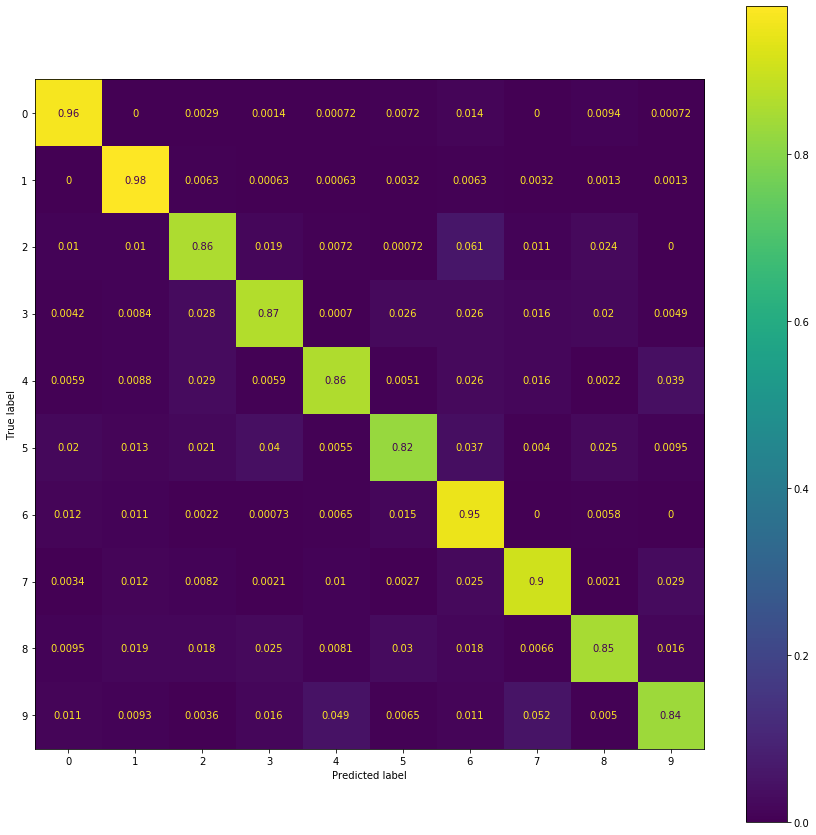

In [76]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(rnd_search.best_estimator_, X_test_std, y_test, normalize="true", ax=ax)

- As seen, the model classifies the 0, 1 and 6 very well. Would be much better if trained on the whole dataset.
- The model seem to struggle the most with 5s

In [71]:
f1_score(y_test, y_test_pred, average="weighted")

0.8901316634684521

In [73]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred, average="weighted")

0.8917221427537403

In [74]:
recall_score(y_test, y_test_pred, average="weighted")

0.8905714285714286

### Training Final Model 

In [15]:
# RandomizedSearchCV focusing around the optimal parameters found above
from scipy.stats import uniform, reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_distributions = [{"C" : uniform(4, 7),
                       "gamma": reciprocal(0.001, 0.01)}]
svc = SVC(kernel="rbf", gamma="scale")
rnd_search = RandomizedSearchCV(svc, param_distributions, cv=3, n_iter=10, verbose=2, n_jobs=-1)
rnd_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 229.7min finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x140abca90>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x140abcb50>}],
                   verbose=2)

In [16]:
rnd_search.best_params_

{'C': 7.412477788674208, 'gamma': 0.0014270121434684475}

In [17]:
rnd_search.best_score_

0.966678576190569

In [32]:
X_test_std = std.fit_transform(X_test)

In [33]:
y_test_pred = rnd_search.best_estimator_.predict(X_test_std)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9705714285714285

### Final Model

In [35]:
# Re-training the model with the whole training set on with the best parameters
svc = SVC(kernel="rbf", gamma=0.0014270121434684475, C=7.412477788674208)
svc.fit(X_train_std, y_train)

SVC(C=7.412477788674208, gamma=0.0014270121434684475)

In [36]:
y_test_pred = svc.predict(X_test_std)

In [37]:
accuracy_score(y_test, y_test_pred)

0.9705714285714285

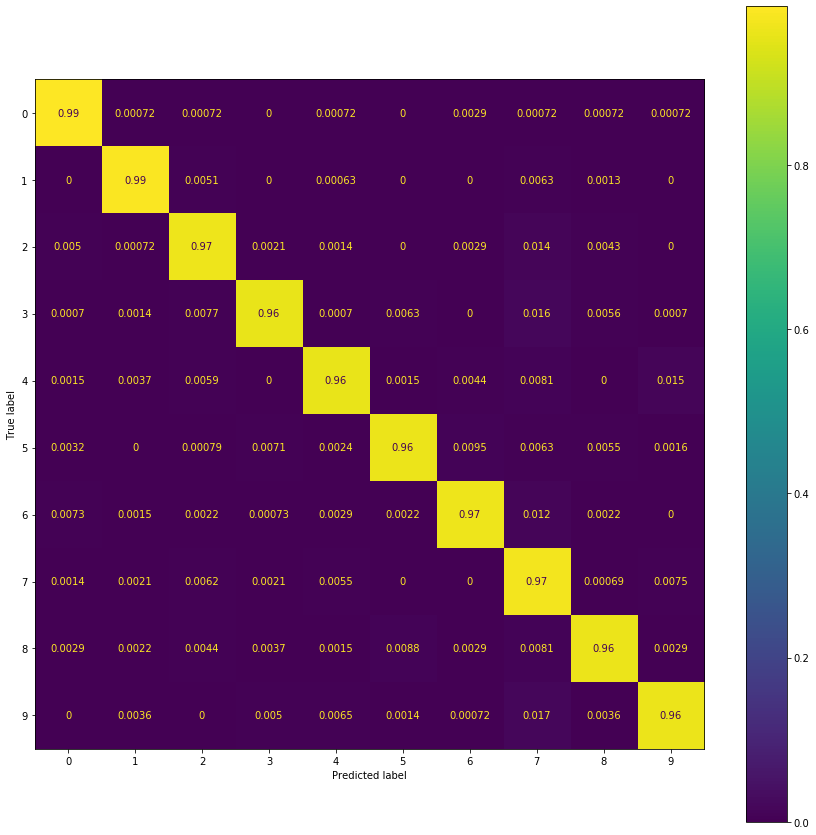

In [41]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(svc, X_test_std, y_test, normalize="true", ax=ax)

In [40]:
# Save the final model
import pickle
filename = 'svc_final.pkl'
pickle.dump(svc, open(filename, 'wb'))

#### Comparing model with simple logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_std, y_train)

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
y_test_pred_clf = clf.predict(X_test_std)

In [44]:
accuracy_score(y_test, y_test_pred_clf)

0.9181428571428571

As seen above, the standard logistic regression model got a significantly less score with a 91,8% accuracy.

# Additional Measures

### Data Augmentation --> Could not be done, too large training set size.

The data augmentation process increases the memory size of the X_train array significantly.  
It increases the matrix size from (56000, 784) to **(56000*7, 784) --> (392000, 784)**

As the memory usage for 1 cell is 8 bytes , the total bits for the array is **2459 MB --> 2.5 GB**  
- This causes extremely long training times for SVC, especially with hyperparamater optimization, hence Im leaving out the Data Augmentation from this project.
- It overloads my MAC RAM memory, as my RAM usage is around 6GB without the python application (8GB Max RAM)

In [14]:
from scipy.ndimage.interpolation import shift, rotate

In [15]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [16]:
def rotate_image(image, deg):
    image = image.reshape((28,28))
    rotated_image = rotate(image, deg, reshape=False)
    return rotated_image.reshape([-1])

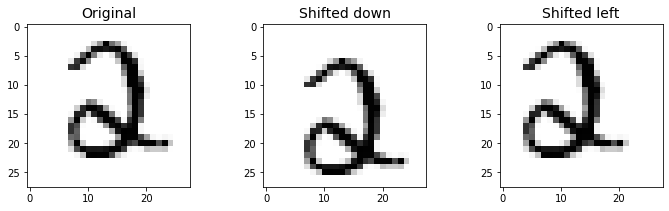

In [17]:
image = X_train[1000]
shifted_image_down = shift_image(image, 3, 0)
shifted_image_left = shift_image(image, 0, -3)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

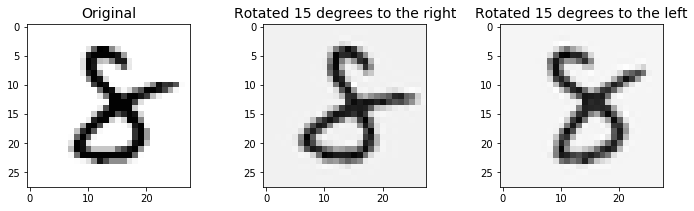

In [18]:
image = X_train[1100]
rotated_image_right = rotate_image(image, -12)
rotated_image_left = rotate_image(image, 12)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Rotated 15 degrees to the right", fontsize=14)
plt.imshow(rotated_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Rotated 15 degrees to the left", fontsize=14)
plt.imshow(rotated_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [19]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# Adding shifted images to the dataset --> TOO LARGE FOR TRAINING.
for dx, dy in ((1, 0), (0, 1), (-1, 0), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

# Adding rotated images to the dataset
for deg in [12, -12]:
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(rotate_image(image, deg))
        y_train_augmented.append(label)

In [ ]:
print("X Shape", X_train_augmented.shape)
print("y Shape", y_train_augmented.shape)

In [ ]:
# Standardize the X_train_augumented
X_train_aug_std = std.fit_transform(X_train_augmented)

In [ ]:
param_distributions = [{"C" : uniform(4, 7),
                       "gamma": reciprocal(0.001, 0.1)}]
svc = SVC(kernel="rbf", gamma="scale")
rnd_search = RandomizedSearchCV(svc, param_distributions, cv=3, n_iter=5, verbose=2)
rnd_search.fit(X_train_augmented, y_train_augmented)